# Descripción del Taller 3 (parte 2) de clase
 Unificación de los repositorios de datos abiertos:
 1. https://www.datos.gov.co/Salud-y-Protecci-n-Social/Poblaci-n-Base-de-Datos-nica-de-Afiliados-BDUA-del/tq4m-hmg2/about_data (subsidiario)
 2. https://www.datos.gov.co/Salud-y-Protecci-n-Social/Poblaci-n-Base-de-Datos-nica-de-Afiliados-BDUA-del/d7a5-cnra/about_data (contributivo)

 ---
 Info especial:
* SBS RÉGIMEN SUBSIDIADO
* SBS -CM EPS COMPLEMENTARIA MOVILIDAD RÉGIMEN SUBSIDIADO
---
**prerequisitos**
1. creación de la DB en sqlite en googleDrive
2. creación de tablas maestras (departamentos, municipios,sisben, Eps)
3. cargue de información en tabla "Detalle" del regimen contributivo
---
**actividades a realizar**
1. cargue del DataSet de subsidiario a un objeto panda, visualice las 5 primeras filas
2. Estadísticas descriptivas comparativa (contributivo VS subsidiario), responsa las siguientes preguntas:
* Que tipó de información es (las mismas columnas)?
* Cuantos registros son?
3. Integrar el nuevo dataSet a la base de datos SQLITE
* Se requiere agregar nuevos datos a las tablas categoricas (Departamento, municipios, Sisben, Eps)
* cargue la información del dataset a la tabla detalle
4. Genere consultas SQL a las tablas creadas
* Total de usuarios por EPS
* Total de usuarios por Regimen
* Total de usuarios por Municipios

# Identificación:
* Nombre: xxxxx
* correo: xxx
* asignatura: xxxxx

# PreRequisitos

##PR1.Trabajaremos con Google Drive (db sqlite existente)

In [1]:
# habilitamos drive de google desde colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##PR2. Instanciar BD sqlite Existente


In [2]:
#Crear una base de datos SQLITE para crear tablas maestras
import os
import sqlite3
# ruta de la base de datos en Google Drive
db_path = '/content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/Ejercicios_de_clase/DataBase/DB_BDUA.db'
db_dir = os.path.dirname(db_path)
if os.path.exists(db_dir):
  try:
      # Connetamos la database (sino existe cree la base de datos)
      conn = sqlite3.connect(db_path)
      cursor = conn.cursor()            #objeto que usaremos para interacturar con la bd
      print(f"CONECTADO a la  base de datos: {db_path}")
      conn.commit()
      conn.close()
  except sqlite3.Error as e:
      print(f"se genera el error: {e}")
else:
    print(f"El directorio '{db_dir}' NO existe.")

CONECTADO a la  base de datos: /content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/Ejercicios_de_clase/DataBase/DB_BDUA.db


In [19]:
# cuando se bloquea SQLITE, BUSCAR proceso asociado al sqlite
!lsof | grep {db_path.split('/')[-1]}

# mata el proceso ejemplo: asumiento que el ID of 1234 es
# !kill 1234

python3   16300                 root   48u      REG               0,53 30089216      56 /content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/Ejercicios_de_clase/DataBase/DB_BDUA.db
python3   16300 16306 python3   root   48u      REG               0,53 30089216      56 /content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/Ejercicios_de_clase/DataBase/DB_BDUA.db
python3   16300 16307 ZMQbg/Rea root   48u      REG               0,53 30089216      56 /content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/Ejercicios_de_clase/DataBase/DB_BDUA.db
python3   16300 16308 ZMQbg/IO/ root   48u      REG               0,53 30089216      56 /content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/Ejercicios_de_clase/DataBase/DB_BDUA.db
python3   16300 16309 python3   root   48u      REG               0,53 30089216      56 /content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de

##PR3. Funciones DML

###F1. Revisar_contenido_de_tablas

In [3]:
def revisar_contenido_de_tablas(tablaNombre, WhereColumna='', WhereValue='', limit=10, order_by_column=None, order_asc=True):
  conn = sqlite3.connect(db_path)
  cursor = conn.cursor()
  cursor.execute("SELECT COUNT(*) FROM "+tablaNombre)
  total_registros = cursor.fetchone()[0]
  print("\nTotal de registros en la tabla ",tablaNombre," =",total_registros)
  #-------------------------liste los registros-------------------------
  sql = "SELECT * FROM " + tablaNombre
  if len(WhereColumna) > 0:
    sql += " WHERE " + WhereColumna + " = ?"

  if order_by_column is not None:
      order_direction = "ASC" if order_asc else "DESC"
      sql += f" ORDER BY {order_by_column} {order_direction}"

  sql += " LIMIT " + str(limit)  # agrege el limite despues del order by

  #print(sql)
  if len(WhereColumna) == 0 :
    cursor.execute(sql)
  else:
    cursor.execute(sql, (WhereValue,))

  results = cursor.fetchall()
  # Mostrar los resultados
  for row in results:
      print(row)
  conn.commit()
  conn.close()

###F2. ejecutar Select

In [39]:
def execute_Select(query):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()
    for row in results:
        print(row)
    conn.close()

###F3. Cargar_datos_maestros
---
contabilizando los nuevos registos

In [4]:
# --- Carga de datos a las tablas maestras ---
def cargar_datos_maestros(df, columna, tabla_destino):
    valores_unicos = df[columna].unique()
    for valor in valores_unicos:
        if pd.notna(valor):  # Ignorar valores NaN
          try:
              cursor.execute(f"INSERT INTO {tabla_destino} (nombre_{tabla_destino.replace('_', '')}) VALUES (?)", (valor,))
              print("Nuevo [",valor,"] en [",tabla_destino,"]")
          except sqlite3.IntegrityError: #Ignora los errores de duplicados
              pass

###F4. cargar_municipios
---
contabilizando los nuevos registos

In [12]:
def cargar_municipios(df):
    try:
        totCreados=0
        for index, row in df.iterrows():
            departamento = row['Departamento']
            municipio    = row['Municipio']
            # Obtener el ID del departamento
            cursor.execute("SELECT id_departamento FROM Departamento WHERE nombre_departamento = ?", (departamento,))
            departamento_id = cursor.fetchone()
            if departamento_id:
                departamento_id = departamento_id[0]
                try:
                    cursor.execute("INSERT INTO Municipio (nombre_municipio, id_departamento) VALUES (?, ?)", (municipio, departamento_id))
                    totCreados+=1
                    print("Creado ",totCreados," Municipios, [",municipio,"] al Dpto [",departamento,"] ")
                except sqlite3.IntegrityError:
                    pass  # Ignorar si el municipio ya existe
                except sqlite3.Error as e:
                    print("Error al insertar el municipio [",municipio,"], en DPTO [",departamento_id,"]: Error:[",e,"]")
                    conn.rollback() #Revertir la transacción en caso de error
                    return False # Indicar fallo en la carga
            else:
                print(f"Error: No se encontró el departamento '{departamento}' para el municipio '{municipio}'.")
                conn.rollback() #Revertir la transacción en caso de error
                return False # Indicar fallo en la carga
        return True # Indicar éxito en la carga
    except sqlite3.Error as e:
        print(f"Error al conectar o cargar datos a la base de datos: {e}")
        return False

###F5. cargar_datos_eps
---
contabilizando los nuevos registos


In [15]:
#funcion para cargar datos maestros a la tabla EPS de SQLITE, donde los valores unicos de las columnas: "Código de la entidad" y  "Nombre de la entidad"
def cargar_datos_eps(df, tabla_destino):
    valores_unicos = df[['Código de la entidad', 'Nombre de la entidad']].drop_duplicates()   #solo deje valores unicos
    TotCreadas=0
    for index, row in valores_unicos.iterrows():
        codigo_eps = row['Código de la entidad']
        nombre_eps = row['Nombre de la entidad']
        try:
            cursor.execute(f"INSERT INTO {tabla_destino} (codigo_EPS, nombre_EPS) VALUES (?, ?)", (codigo_eps, nombre_eps))
            TotCreadas+=1
            print (TotCreadas,", Nueva EPS [",codigo_eps,"]-[",nombre_eps,"]")
        except sqlite3.IntegrityError:
            # Ignorar errores de duplicados
            pass

###F6. cargar_detalle
---
Ojo con los campos que tiene nombres parecidos:
* "Género" => "Genero",
* "Grupo etario" =>  "Grupo etario "
* "Régimen" => "Régimen al que pertenece"
* "Cantidad de registros" => "cantidad"

In [36]:
def cargar_detalle(df, db_path):
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        for index, row in df.iterrows():
            if row['Nivel del Sisbén'] is None:
              sisben_id=0
            else:
              cursor.execute("SELECT id_sisben FROM Sisben WHERE nombre_sisben = ?", (row['Nivel del Sisbén'],))
              sisben_id = cursor.fetchone()
              if sisben_id is None:
                sisben_id = 0
              else:# Si hay un resultado, extrae el valor de id_sisben
                sisben_id = sisben_id[0]

            # Obtener IDs de las tablas maestras
            cursor.execute("SELECT id_municipio FROM Municipio WHERE nombre_municipio = ? AND id_departamento = (SELECT id_departamento FROM Departamento WHERE nombre_departamento = ?)", (row['Municipio'], row['Departamento']))
            municipio_id = cursor.fetchone()
            #print(municipio_id, ' and ',sisben_id)
            # Insertar datos en la tabla detalle
            if municipio_id:
                try:
                    cursor.execute('''INSERT INTO Detalle (Genero, GrupoEtario, Regimen, TipoAfiliado, EstadoAfiliado, CondicionBeneficiario, ZonaAfiliacion, id_municipio, codigo_eps, id_sisben, CantidadRegistros)
                                      VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''',
                                       (row['Genero'],
                                        row['Grupo etario '],
                                        row['Régimen al que pertenece'],
                                        row['Tipo de afiliado'],
                                        row['Estado del afiliado'],
                                        row['Condición del beneficiario'],
                                        row['Zona de Afiliación'], municipio_id[0], row['Código de la entidad'], sisben_id, row['cantidad']))
                except sqlite3.Error as e:
                    print(f"Error al insertar en Detalle: {e}")
                    conn.rollback()
                    return False
            else:
                print(f"Error: No se encontraron ID del municipio para la fila {index}.")
                print(f"Municipio: {row['Municipio']}, Código de la entidad: {row['Código de la entidad']}, EPS: {row['Nombre de la entidad']}, Sisben: {row['Nivel del Sisbén']}")
                #conn.rollback()
                #return False

        conn.commit()
        conn.close()
        return True

    except sqlite3.Error as e:
        print(f"Error en la conexión o carga de datos a Detalle: {e}")
        return False

In [7]:
revisar_contenido_de_tablas('Sisben','','',100,2,True)


Total de registros en la tabla  Sisben  = 19
(4, 'ADULTO MAYOR EN CENTROS DE PROTECCIÓN')
(5, 'COMUNIDADES INDÍGENAS')
(9, 'HABITANTE DE LA CALLE')
(11, 'LOS VOLUNTARIOS ACREDITADOS Y ACTIVOS DE LA DEFENSA CIVIL COLOMBIANA CRUZ ROJA COLOMBIANA Y CUERPOS DE BOMBEROS')
(19, 'MENORES DESVINCULADOS DEL CONFLICTO ARMADO BAJO LA PROTECCIÓN DEL ICBF.')
(7, 'MIGRANTES COLOMBIANOS REPATRIADOS QUE HAN RETORNADO VOLUNTARIAMENTE AL PAÍS O HAN SIDO DEPORTADOS O EXPULSADOS DE TERRITORIO EXTRANJERO.')
(6, 'NIÑOS-NIÑAS-ADOLESCENTES Y JÓVENES EN PROCESO ADMINISTRATIVO PARA EL RESTABLECIMIENTO DE SUS DERECHOS')
(18, 'PERSONAS CON DISCAPACIDAD EN CENTROS DE PROTECCIÓN')
(12, 'PERSONAS EN PRISIÓN DOMICILIARIA A CARGO DEL INPEC.')
(14, 'PERSONAS QUE DEJEN DE SER MADRES COMUNITARIAS.')
(2, 'POBLACIÓN CON SISBEN')
(13, 'POBLACIÓN DESMOVILIZADA Y/O MIEMBROS DEL GRUPO ARMADO ILEGAL QUE CELEBREN ACUERDOS DE PAZ CON EL GOBIERNO NACIONAL')
(3, 'POBLACIÓN INFANTIL VULNERABLE BAJO PROTECCIÓN DE INSTITUCIONES DIFER

#Actividades

##A1. Cargue del DataSet de subsidiario a un objeto panda
 ---
 visualice las 5 primeras filas



In [9]:
import pandas as pd
# Ruta del archivo en Google Drive
file_path = '/content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/Ejercicios_de_clase/DataBase/Poblaci_n_Base_de_Datos__nica_de_Afiliados_BDUA_del_r_gimen_subsidiado.csv'
try:
  df = pd.read_csv(file_path)
  # Visualizar las primeras 5 filas
  print("\nPrimeras 5 filas del DataFrame:")
  # Mostrar las primeras 5 filas
  pd.set_option('display.max_columns', None)
  print(df.head(10).to_string(index=False))

except FileNotFoundError:
  print(f"Error: No se encontró el archivo en la ruta especificada: {file_path}")
except Exception as e:
  print(f"Ocurrió un error: {e}")


Primeras 5 filas del DataFrame:
   Genero Grupo etario  Código de la entidad                                                                              Nombre de la entidad Régimen al que pertenece  Tipo de afiliado Estado del afiliado Condición del beneficiario Zona de Afiliación Departamento         Municipio Nivel del Sisbén                                                     Grupo poblacional del afiliado  cantidad
Masculino       45 a 50               ESS118                                                                                   EMSSANAR S.A.S.               Subsidiado CABEZA DE FAMILIA              Activo                  NO APLICA             Urbana     PUTUMAYO VALLE DEL GUAMUEZ                0                                                                                NaN         2
Masculino       19 a 45               EPSS37                                                                                NUEVA EPS S.A. -CM               Subsidiado CABEZA DE FAM

## A2. Estadísticas descriptivas (comparativas)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925482 entries, 0 to 925481
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Genero                          925482 non-null  object
 1   Grupo etario                    925482 non-null  object
 2   Código de la entidad            925482 non-null  object
 3   Nombre de la entidad            925482 non-null  object
 4   Régimen al que pertenece        925482 non-null  object
 5   Tipo de afiliado                925482 non-null  object
 6   Estado del afiliado             925482 non-null  object
 7   Condición del beneficiario      925482 non-null  object
 8   Zona de Afiliación              925482 non-null  object
 9   Departamento                    925482 non-null  object
 10  Municipio                       925482 non-null  object
 11  Nivel del Sisbén                923562 non-null  object
 12  Grupo poblacional del afiliado

In [8]:
 # Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
            cantidad
count  925482.000000
mean       29.092960
std       246.805883
min         1.000000
25%         1.000000
50%         3.000000
75%        12.000000
max     68611.000000


In [11]:
print(df['Genero'].value_counts())

Genero
Masculino    475865
Femenino     449617
Name: count, dtype: int64


In [ ]:
#  total "Cantidad de registros" por "Nombre de la entidad" y el porcentaje sobre el la suma total de "Cantidad de registros" y visualice ordenando de mayor a menor el porcentaje

# Agrupar por 'Nombre de la entidad' y sumar 'Cantidad de registros'
entidad_registros = df.groupby('Nombre de la entidad')['cantidad'].sum()

# Calcular el porcentaje sobre el total
total_registros = df['cantidad'].sum()
entidad_porcentaje = (entidad_registros / total_registros) * 100

# Crear un DataFrame con los resultados
resultado_df = pd.DataFrame({'cantidad': entidad_registros, 'Porcentaje': entidad_porcentaje})

# Ordenar el DataFrame por porcentaje de mayor a menor
resultado_df = resultado_df.sort_values('Porcentaje', ascending=False)

# Visualizar el DataFrame
resultado_df


##A3.Integrar el nuevo dataSet a la base de datos SQLITE

In [ ]:
#------------cargar NUEVOS departamentos----------------
#cargar_datos_maestros(df, 'Departamento', 'Departamento')

#------------cargar NUEVAS categorias del SISBEN-------------
cargar_datos_maestros(df, 'Nivel del Sisbén', 'Sisben')

In [10]:
#---------------cargar NUEVOS municipios-----------------------------
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cargar_municipios(df)
conn.commit()
conn.close()

Creado  1  Municipios
Creado  2  Municipios
Creado  3  Municipios
Creado  4  Municipios


In [ ]:
#-------------------cargar NUEVAS EPS ----------------------
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cargar_datos_eps(df, 'Eps')
conn.commit()
conn.close()

In [ ]:
revisar_contenido_de_tablas('Eps','','',1000,2,True)

In [ ]:
# Llamar a la función para cargar los datos de EPS
cargar_datos_eps(df,db_path, 'EPS')
print("Datos cargados exitosamente a la Tabla maestra EPS")

In [ ]:
print(df.info())
cargar_detalle(df, db_path)

##A4. Consultas SQL a las tablas creadas


###C1. Total de usuarios por EPS

In [48]:
sql=""" SELECT e.codigo_EPS, e.nombre_EPS, SUM(d.CantidadRegistros) total
          FROM eps e
          INNER JOIN detalle d ON e.codigo_EPS=d.codigo_eps
          WHERE d.regimen='Subsidiado'
          GROUP BY e.codigo_EPS, e.nombre_EPS
          ORDER BY total DESC """
execute_query(sql)


('ESS118', 'EMSSANAR S.A.S.', 1617220)
('EPSS02', 'SALUD TOTAL ENTIDAD PROMOTORA DE SALUD DEL REGIMEN CONTRIBUTIVO Y DEL REGIMEN SUBSIDIADO S.A. -CM', 1554915)
('EPSS40', 'ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S. "SAVIA SALUD EPS', 1551791)
('ESS062', 'ASMET SALUD EPS S.A.S.', 1510508)
('EPSS05', 'ENTIDAD PROMOTORA DE SALUD SANITAS S.A.S. -CM', 1467145)
('CCF055', 'CAJACOPI EPS S.A.S', 1362814)
('EPSS34', 'CAPITAL SALUD ENTIDAD PROMOTORA DE SALUD DEL RÉGIMEN SUBSIDIADO SAS "CAPITAL SALUD EPS-S S.A.S.', 1029658)
('EPSS17', 'EPS FAMISANAR S.A.S. -CM', 905014)
('EPSS10', 'EPS SURAMERICANA S.A. -CM', 874586)
('EPSI05', 'ENTIDAD PROMOTORA DE SALUD MALLAMAS EPSI', 404975)
('CCF033', 'EPS FAMILIAR DE COLOMBIA S.A.S.', 325198)
('EPSI03', 'ASOCIACIÓN INDÍGENA DEL CAUCA A.I.C. EPSI', 311853)
('EPSS08', 'CAJA DE COMPENSACIÓN FAMILIAR COMPENSAR -CM', 287367)
('EPSI01', 'ASOCIACIÓN DE CABILDOS INDÍGENAS DEL CESAR Y GUAJIRA "DUSAKAWI A.R.S.I.', 280626)
('EPSI04', 'EMPRESA PROMOTORA DE SALUD INDÍGENA AN

###C2.Total de usuarios por Regimen

In [57]:
sql=""" SELECT d.regimen,d.Genero,GrupoEtario,ZonaAfiliacion, SUM(d.CantidadRegistros) total
          FROM eps e
          INNER JOIN detalle d ON e.codigo_EPS=d.codigo_eps
           WHERE d.regimen='Subsidiado'
          GROUP BY d.regimen,Genero,GrupoEtario,ZonaAfiliacion
          ORDER BY total DESC """
execute_query(sql)

('Subsidiado', 'Femenino', '19 a 45', 'Urbana', 2183252)
('Subsidiado', 'Masculino', '19 a 45', 'Urbana', 1996991)
('Subsidiado', 'Masculino', '5 a 15', 'Urbana', 888953)
('Subsidiado', 'Femenino', '5 a 15', 'Urbana', 846640)
('Subsidiado', 'Femenino', '19 a 45', 'Rural', 744335)
('Subsidiado', 'Masculino', '19 a 45', 'Rural', 647280)
('Subsidiado', 'Masculino', '5 a 15', 'Rural', 384250)
('Subsidiado', 'Masculino', '15 a 19', 'Urbana', 380668)
('Subsidiado', 'Femenino', '5 a 15', 'Rural', 366723)
('Subsidiado', 'Femenino', '15 a 19', 'Urbana', 365946)
('Subsidiado', 'Femenino', '45 a 50', 'Urbana', 338865)
('Subsidiado', 'Femenino', '50 a 55', 'Urbana', 313433)
('Subsidiado', 'Femenino', '55 a 60', 'Urbana', 306613)
('Subsidiado', 'Masculino', '45 a 50', 'Urbana', 284638)
('Subsidiado', 'Masculino', '1 a 5', 'Urbana', 282239)
('Subsidiado', 'Femenino', '60 a 65', 'Urbana', 273864)
('Subsidiado', 'Femenino', '1 a 5', 'Urbana', 270467)
('Subsidiado', 'Masculino', '55 a 60', 'Urbana', 26

###C3. Total de usuarios por Municipios

In [66]:
sql=""" SELECT d.nombre_departamento,de.Genero,de.GrupoEtario, SUM(de.CantidadRegistros) total
          FROM departamento d
          INNER JOIN municipio m ON d.id_departamento=m.id_departamento
          INNER JOIN detalle de ON de.id_municipio=m.id_municipio
          INNER JOIN eps e ON e.codigo_EPS=de.codigo_eps
           WHERE de.regimen='Subsidiado'
          GROUP BY d.nombre_departamento,de.Genero,de.GrupoEtario
          ORDER BY total DESC """
execute_query(sql)

('ANTIOQUIA', 'Femenino', '19 a 45', 427187)
('ANTIOQUIA', 'Masculino', '19 a 45', 405803)
('BOGOTA D.C.', 'Femenino', '19 a 45', 328541)
('BOGOTA D.C.', 'Masculino', '19 a 45', 324869)
('VALLE', 'Femenino', '19 a 45', 292048)
('VALLE', 'Masculino', '19 a 45', 249330)
('NARINO', 'Femenino', '19 a 45', 215946)
('NARINO', 'Masculino', '19 a 45', 201027)
('CAUCA', 'Femenino', '19 a 45', 177503)
('CAUCA', 'Masculino', '19 a 45', 163364)
('ANTIOQUIA', 'Masculino', '5 a 15', 161493)
('LA GUAJIRA', 'Femenino', '19 a 45', 153974)
('ANTIOQUIA', 'Femenino', '5 a 15', 153943)
('BOGOTA D.C.', 'Masculino', '5 a 15', 128072)
('CUNDINAMARCA', 'Femenino', '19 a 45', 128040)
('BOGOTA D.C.', 'Femenino', '5 a 15', 122671)
('LA GUAJIRA', 'Masculino', '19 a 45', 121287)
('CUNDINAMARCA', 'Masculino', '19 a 45', 117077)
('LA GUAJIRA', 'Masculino', '5 a 15', 108050)
('ATLANTICO', 'Femenino', '19 a 45', 107039)
('LA GUAJIRA', 'Femenino', '5 a 15', 104533)
('CESAR', 'Femenino', '19 a 45', 103853)
('VALLE', 'Mas

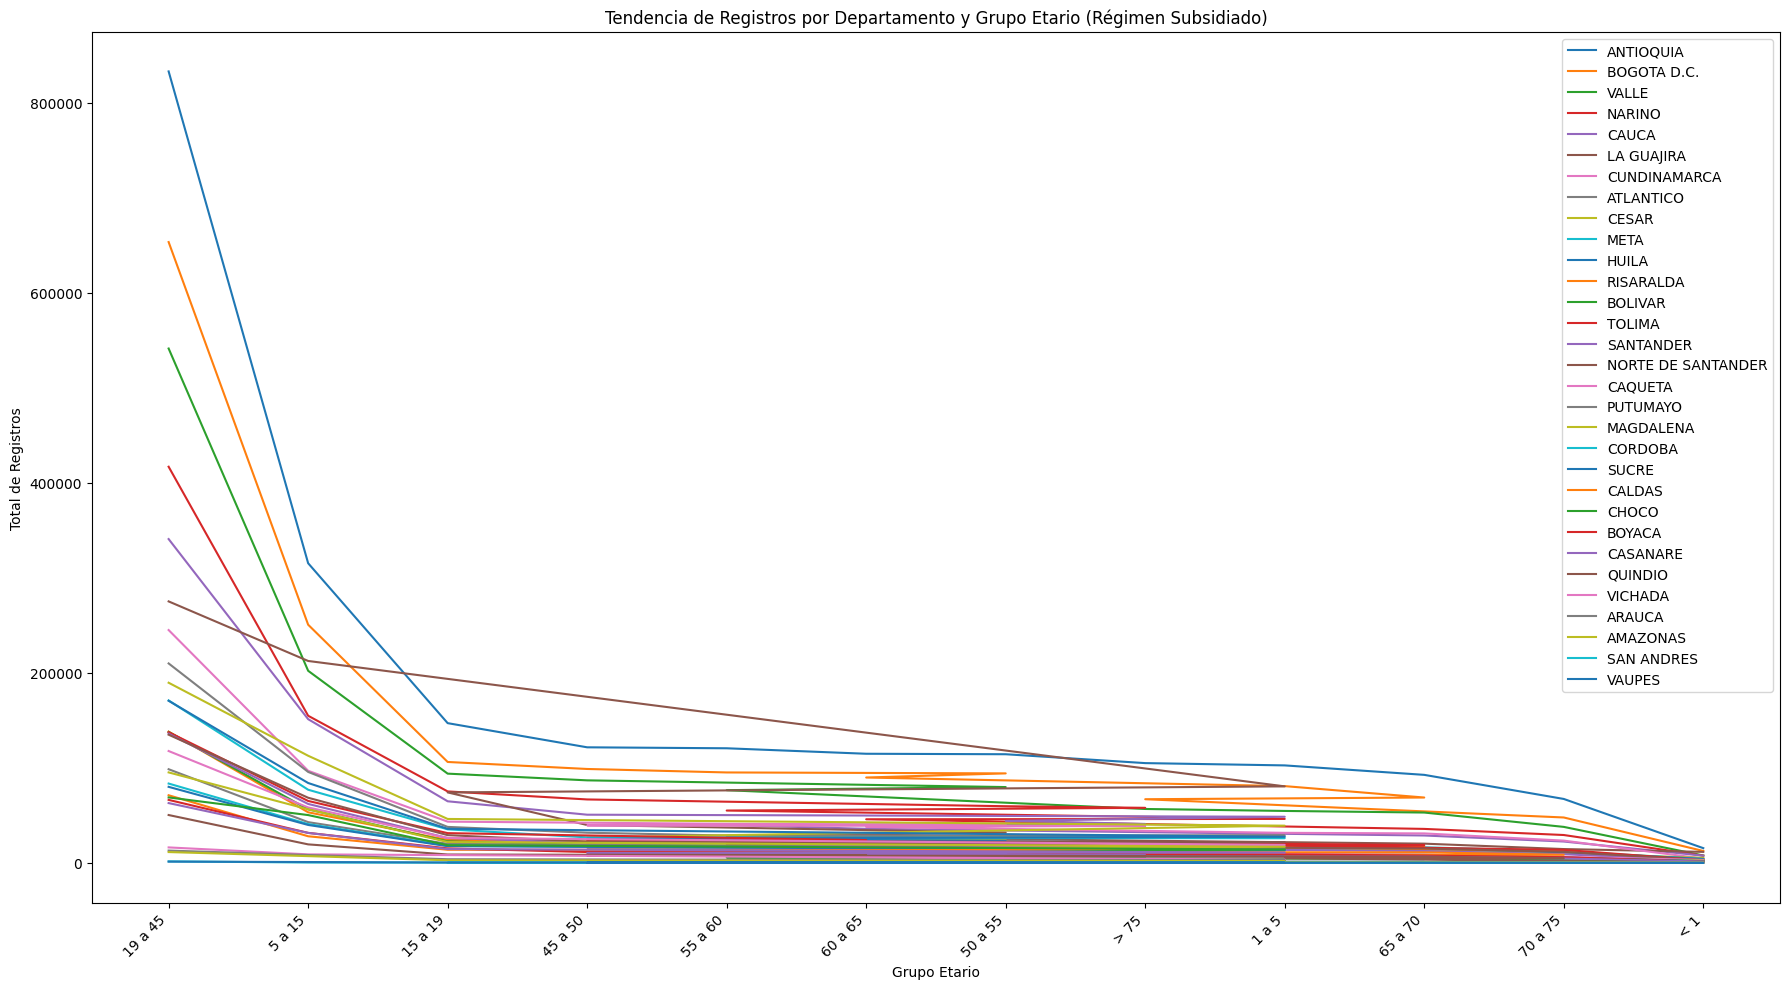

In [68]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def execute_query(sql):
    conn = sqlite3.connect(db_path)
    df = pd.read_sql_query(sql, conn)
    conn.close()
    return df

db_path = '/content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/Ejercicios_de_clase/DataBase/DB_BDUA.db'

sql=""" SELECT d.nombre_departamento,de.GrupoEtario, SUM(de.CantidadRegistros) total
          FROM departamento d
          INNER JOIN municipio m ON d.id_departamento=m.id_departamento
          INNER JOIN detalle de ON de.id_municipio=m.id_municipio
          INNER JOIN eps e ON e.codigo_EPS=de.codigo_eps
           WHERE de.regimen='Subsidiado'
          GROUP BY d.nombre_departamento,de.GrupoEtario
          ORDER BY total DESC """

df_trend = execute_query(sql)

# Create the trend plot
plt.figure(figsize=(18, 10))
for department in df_trend['nombre_departamento'].unique():
    department_data = df_trend[df_trend['nombre_departamento'] == department]
    plt.plot(department_data['GrupoEtario'], department_data['total'], label=department)

plt.xlabel('Grupo Etario')
plt.ylabel('Total de Registros')
plt.title('Tendencia de Registros por Departamento y Grupo Etario (Régimen Subsidiado)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
